In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

In [2]:
files = [f for f in listdir('Tweets') if isfile(join('Tweets', f))]

In [3]:
df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_pickle('Tweets/'+file)]) # TODO change file path for windows

In [4]:
df

,author_id,lang,created_at,conversation_id,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,in_reply_to_user_id,context_annotations,referenced_tweets,query,attachments.media_keys,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates
0,741963909767237636,de,2022-05-18T08:47:41.000Z,1526846979342577665,Betrunkener fährt mit Fahrrad auf Autobahn 6 -...,1526846979342577665,0,0,1,0,NaN,NaN,NaN,regio Fahrrad,NaN,NaN,NaN,NaN
1,1438453233836568577,de,2022-05-16T11:06:26.000Z,1526157117580787712,"Ok Leute nein, entscheidet euch ob ihr regio f...",1526157117580787712,0,2,9,0,NaN,NaN,NaN,regio Fahrrad,NaN,NaN,NaN,NaN
2,529076568,de,2022-05-14T17:46:49.000Z,1525531166593384451,"@jmbeuter @DB_Bahn Ja komplett nicht, einTicke...",1525533103317561351,0,1,1,0,794631915844341760,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...","[{'type': 'replied_to', 'id': '152553196829695...",regio Fahrrad,NaN,NaN,NaN,NaN
0,140046785,de,2022-05-17T05:33:01.000Z,1526435602081665025,Heute 2. Tag mit Bahn und Rad zur Arbeit. Läuf...,1526435602081665025,0,0,0,0,NaN,NaN,NaN,regio rad,NaN,NaN,NaN,NaN
1,1103981676252794885,de,2022-05-15T12:18:32.000Z,1525812876442845184,RT @aufgeraucht: Nochmal mit Rad&amp;Regio unt...,1525812876442845184,1,0,0,0,NaN,NaN,"[{'type': 'retweeted', 'id': '1525798782834712...",regio rad,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,44665795,en,2022-05-15T02:08:09.000Z,1525659265985290240,We hope your weekend looks and feels just like...,1525659265985290240,2,0,2,0,NaN,"[{'domain': {'id': '6', 'name': 'Sports Event'...",NaN,RE Mountainbike,[3_1525659263326212096],NaN,NaN,NaN
3,1282001810144792578,en,2022-05-10T22:12:59.000Z,1524150535431102465,RT @OutbackMTB: When you're too fast for reali...,1524150535431102465,1,0,0,0,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...","[{'type': 'retweeted', 'id': '1524118372694253...",RE Mountainbike,NaN,NaN,NaN,NaN
4,1287460950468165632,en,2022-05-10T20:05:11.000Z,1524118372694253570,When you're too fast for reality 😎\nFollow ➡️ ...,1524118372694253570,1,0,6,0,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",NaN,RE Mountainbike,[7_1524118333813104643],NaN,NaN,NaN
5,1331751832750678016,en,2022-05-09T00:05:29.000Z,1523454069712449542,Wondering if you’re addicted to mountain bikin...,1523454069712449542,0,0,0,1,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",NaN,RE Mountainbike,NaN,NaN,NaN,NaN


In [5]:
df_tmp = df[['id', 'created_at', 'public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count', 'public_metrics.quote_count','query']]
df_tmp = pd.merge(df_tmp.groupby('id').agg({'public_metrics.retweet_count': 'max', 
                          'public_metrics.reply_count': 'max', 
                          'public_metrics.like_count': 'max', 
                          'public_metrics.quote_count': 'max'}),
         df_tmp.groupby('id')['query'].apply(list),
         on='id', how='inner')


In [6]:
df_tmp

,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,query
id,,,,,
1518193757107240960,0,1,2,0,[Tram bike]
1518198704490037249,2,0,0,0,[ICE rad]
1518198853580767232,6,0,0,0,[Zug Fahrrad]
1518199273569062912,46,0,0,0,[Stadtbahn Fahrrad]
1518203567496118273,0,1,3,0,[RE ebike]
...,...,...,...,...,...
1527938288048390144,0,0,0,0,[RE bike]
1527938331551494149,394,0,0,0,[RE bike]
1527938386975145984,0,0,0,0,[Bus bike]


In [7]:
df_tmp.reset_index()

,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,query
0,1518193757107240960,0,1,2,0,[Tram bike]
1,1518198704490037249,2,0,0,0,[ICE rad]
2,1518198853580767232,6,0,0,0,[Zug Fahrrad]
3,1518199273569062912,46,0,0,0,[Stadtbahn Fahrrad]
4,1518203567496118273,0,1,3,0,[RE ebike]
...,...,...,...,...,...,...
6962,1527938288048390144,0,0,0,0,[RE bike]
6963,1527938331551494149,394,0,0,0,[RE bike]
6964,1527938386975145984,0,0,0,0,[Bus bike]
6965,1527938440263651328,0,0,0,0,[Bus bike]


In [8]:
df = pd.merge(df[['text', 'id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count',             
             'lang',
             'created_at', 
             'conversation_id', 
             'author_id', 
            ]].drop_duplicates(), 
         df_tmp.reset_index(),
         on=['id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count'], 
         how='right').dropna()
df['is_retweet'] = pd.np.where(df.text.str.startswith('RT '),1,0)
df['created_at_day'] = df['created_at'].apply(lambda x: x[:10])
df['created_at_day'] = pd.to_datetime(df['created_at_day']).dt.date

<ipython-input-8-03000e42776a>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['is_retweet'] = pd.np.where(df.text.str.startswith('RT '),1,0)


In [9]:
df[(df['public_metrics.retweet_count'] > 0) & (df['public_metrics.retweet_count'] < 5)]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad],1,2022-04-24
21,RT @lowercayce: I have even more love for all ...,1518235889167593472,2,0,0,0,en,2022-04-24T14:30:18.000Z,1518235889167593472,701502940566069248,[ICE rad],1,2022-04-24
23,#PSA our recent data collection project shows ...,1518236320149106688,1,0,0,0,en,2022-04-24T14:32:00.000Z,1518236320149106688,1434023642447286273,[RE ebike],0,2022-04-24
29,RT @BeautyHealthHip: One Of Best Exercise Bike...,1518245037850697730,1,0,0,0,en,2022-04-24T15:06:39.000Z,1518245037850697730,4077758069,[IC bike],1,2022-04-24
30,RT @epowersportllc: #PSA our recent data colle...,1518247878774431744,1,0,0,0,en,2022-04-24T15:17:56.000Z,1518247878774431744,2369054990,[RE ebike],1,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,Überfüllter #ÖPNV dank #9EuroTicket und parall...,1527931142661357569,1,0,3,0,de,2022-05-21T08:35:46.000Z,1527931142661357569,1094694430299357189,[ÖPNV Fahrrad],0,2022-05-21
6920,RT @pfalzbote: Überfüllter #ÖPNV dank #9EuroTi...,1527931375013216256,1,0,0,0,de,2022-05-21T08:36:42.000Z,1527931375013216256,1323919737127096320,[ÖPNV Fahrrad],1,2022-05-21
6942,RT @KO6YQ: I arrived on time at SJ Bike Party ...,1527933715120238592,1,0,0,0,en,2022-05-21T08:45:59.000Z,1527933715120238592,37786023,[RE bike],1,2022-05-21
6943,RT @zymurgic: @TheWarOnCars There are plenty o...,1527933872851365889,1,0,0,0,en,2022-05-21T08:46:37.000Z,1527933872851365889,8721662,"[Bus bike, RE bike]",1,2022-05-21


In [10]:
df[df.lang=='de']

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad],1,2022-04-24
2,RT @Christoph_Br1: Warum sind es eigentlich im...,1518198853580767232,6,0,0,0,de,2022-04-24T12:03:08.000Z,1518198853580767232,966594033027035136,[Zug Fahrrad],1,2022-04-24
3,RT @Micha31281963: Sonntags in den Zoo?\nDie #...,1518199273569062912,46,0,0,0,de,2022-04-24T12:04:48.000Z,1518199273569062912,20429503,[Stadtbahn Fahrrad],1,2022-04-24
6,@radkolumne Seit nun 2 Monaten: Bahn Bus Tram...,1518205949185560577,0,0,0,0,de,2022-04-24T12:31:19.000Z,1518199287871676417,2791876688,[Tram Fahrrad],0,2022-04-24
7,@radkolumne Hab mir gestern extra noch ein geb...,1518208189724045312,0,1,6,0,de,2022-04-24T12:40:14.000Z,1518199287871676417,1108457893555326978,[Zug rad],0,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,"@bike_berlin @BVG_Bus wow, BVG, da könnt ihr e...",1527932631316418560,0,0,0,0,de,2022-05-21T08:41:41.000Z,1527749416479870976,756598590282297344,[Bus bike],0,2022-05-21
6936,@oliver_me @butenunbinnen Erstmal geht's um's ...,1527932993695883265,0,0,0,0,de,2022-05-21T08:43:07.000Z,1527640402374889472,701082255075237888,"[Zug rad, Bus rad, ÖPNV rad]",0,2022-05-21
6940,@sixtus Meine Mutter hat keinen. Mein Vater fä...,1527933503496757251,0,0,0,0,de,2022-05-21T08:45:09.000Z,1527690506830069772,1465057182018326530,"[ÖPNV Fahrrad, ÖPNV rad]",0,2022-05-21
6947,"@sixtus Auf dem Land war es net unüblich, als ...",1527935463310368772,0,0,0,0,de,2022-05-21T08:52:56.000Z,1527690506830069772,1467905474527993861,[Bus rad],0,2022-05-21


In [11]:
df_selected = df[(df.is_retweet == 0) & (df.lang=='de')]

In [12]:
# Importsimport matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df_selected[df_selected['public_metrics.like_count']<101], x="public_metrics.like_count")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Verteilung der Likes')
fig.show()

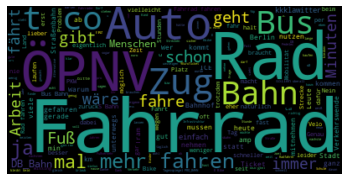

In [13]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(nltk.corpus.stopwords.words('german'))
stopwords.update(["gt", "https"])
textt = " ".join(review for review in df_selected[df_selected.lang=='de'].text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [14]:
print('Dataset size: ', len(df_selected))

Dataset size:  2029


In [15]:
df[df.lang=='de'][['text','public_metrics.like_count']].sort_values(by='public_metrics.like_count', ascending=False)['text'].iloc[9]

'@BR24 Rad &amp; Bahn statt Parkleitsystem!\nStoppt die Anti-Bahn-Politik!'

In [16]:
df[df.lang=='de'].sort_values(by='public_metrics.like_count', ascending=False).text.to_csv('test.csv')

<AxesSubplot:>

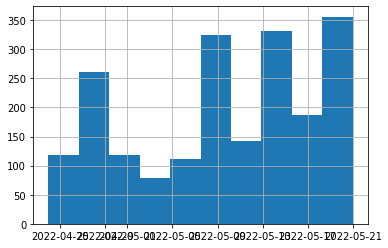

In [17]:
df_selected['created_at_day'].hist()

<AxesSubplot:>

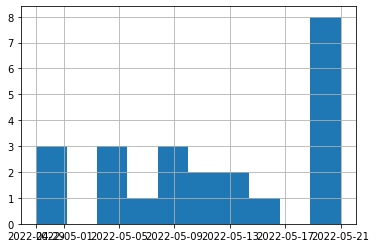

In [18]:
df_selected[df_selected['text'].str.lower().str.contains('9euroticket', regex=True)]['created_at_day'].hist()#.to_csv('test.csv')

In [19]:
df_selected[df_selected['text'].str.lower().str.contains('9euroticket', regex=True)]#['text'].to_csv('test.csv')

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
807,#9EuroTicket \nbin mal mit dem Fahrrad auf de...,1519906206848065536,0,0,0,0,de,2022-04-29T05:07:32.000Z,1519906206848065536,834440014658416640,[Zug Fahrrad],0,2022-04-29
849,#9EuroTicket: Statt superbürokratischen Lösung...,1519964009780367360,17,5,73,1,de,2022-04-29T08:57:14.000Z,1519964009780367360,33557760,[ÖPNV rad],0,2022-04-29
1626,@kkklawitter Das habe ich vor! Auch wenn ich e...,1520691597293273089,0,4,19,1,de,2022-05-01T09:08:24.000Z,1520688962519670784,1084516215970824192,[ÖPNV rad],0,2022-05-01
1848,@PRO_BAHN möchte lt. einem Bericht im @spiegel...,1521740669307478020,0,0,2,0,de,2022-05-04T06:37:02.000Z,1521740669307478020,1632345828,"[Zug Fahrrad, Zug rad]",0,2022-05-04
1891,"#9EuroTicket #sylt Schatz, da kommt keiner dra...",1521862507874377728,0,0,1,0,de,2022-05-04T14:41:11.000Z,1521862507874377728,755346315173826560,[bahn bike],0,2022-05-04
1972,@DB_Presse\n Mal ne Frage:\nWenn ich ab 1.6. i...,1522185630683480065,0,0,0,0,de,2022-05-05T12:05:09.000Z,1522185630683480065,1396530893334929408,[RE Fahrrad],0,2022-05-05
2083,Das #9EuroTicket ist als Übergangslösung sinnv...,1522504028176846848,0,0,0,0,de,2022-05-06T09:10:21.000Z,1522504028176846848,1454938627285397504,[ÖPNV ebike],0,2022-05-06
2462,"@Perowinger94 Innerorts nur noch Fahrrad, ggf....",1523236800483016704,0,0,0,0,de,2022-05-08T09:42:08.000Z,1522183056924332033,1388455907617558530,[bahn Fahrrad],0,2022-05-08
3001,Vorfreude auf das #9EuroTicket :\n\nGerade kam...,1523692988542582786,0,1,1,0,de,2022-05-09T15:54:51.000Z,1523692988542582786,6871172,[bahn rad],0,2022-05-09
3161,Ich fänd ja so ein #9EuroTicket fürs Fliegen ...,1523753450638495745,0,1,0,0,de,2022-05-09T19:55:07.000Z,1523753450638495745,2805347473,"[Zug Fahrrad, Bus Fahrrad, Zug Fahrrad]",0,2022-05-09


In [20]:
df_tmp = pd.DataFrame()
df_tmp['hastag_list'] = df_selected.text.str.findall(r'#.*?(?=\s|$)')
df_tmp['number_hastags'] = df_tmp['hastag_list'].apply(lambda x: len(x))
df_tmp = df_tmp[df_tmp.number_hastags != 0]
hashtags = list()
for i, row in df_tmp.iterrows():
    hashtags += row['hastag_list']

In [21]:
import string
from collections import Counter
hashtag_dict = Counter([s.translate(str.maketrans('', '', string.punctuation)) for s in hashtags])
{k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1])}


{'Freiburg': 1,
 'PodcastGespräch': 1,
 'franken': 1,
 'Nürnberg': 1,
 'ICEWerk': 1,
 'HamburgGewinntPlatz': 1,
 'Expertenbüchern': 1,
 'Kreisverkehre': 1,
 'Grundhaft': 1,
 'Radwege': 1,
 'dashcam': 1,
 'video': 1,
 'fußgänger': 1,
 'Roller': 1,
 'elektro': 1,
 'pkw': 1,
 'lkw': 1,
 'MDRZA': 1,
 'bscyb': 1,
 'ybforever': 1,
 'ewb': 1,
 'carrera': 1,
 'Rosenthal': 1,
 'Fundservice': 1,
 'Pendeln': 1,
 'EnergieUnabhängigkeit': 1,
 'Verkehrsarten': 1,
 'UkraineKrieg': 1,
 'AFDMOL': 1,
 'AfDKreisverbandMärkischOderland': 1,
 'GreatReset': 1,
 'Klimawandel': 1,
 'Energiekrise': 1,
 'Ukraine': 1,
 'Krieg': 1,
 'Ölimport': 1,
 'Klimademo': 1,
 'IchPrangereDasAn': 1,
 'Luxemburg': 1,
 'Verkehrskonzept': 1,
 'TramNetz': 1,
 'dbconnect': 1,
 'Kalkar': 1,
 'nimmsrad': 1,
 'Aachen': 1,
 'Parkgebühren': 1,
 'Parkplätze': 1,
 'Bremen': 1,
 'hvv': 1,
 'fahrradstadt': 1,
 'AlmancaKursA1': 1,
 'deutschtuerkish': 1,
 'ilticaALMANYA': 1,
 'germanexercise': 1,
 'DeutschÜbung': 1,
 'deutscha1': 1,
 'LernD

In [53]:
df_selected[df_selected.text.str.contains('preis')]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
55,@ChrischmiDE @Reiner_Kolberg @FahrradClub Vorb...,1518297164576923648,0,0,1,0,de,2022-04-24T18:33:47.000Z,1518224733023752192,1295504335120617472,[Straßenbahn rad],0,2022-04-24
576,"@who_is_Annett ÖPNV nutzen, falls nicht sowies...",1519549859023437826,0,0,2,0,de,2022-04-28T05:31:32.000Z,1519351136695762951,135577783,[ÖPNV Fahrrad],0,2022-04-28
895,@Aliverable @vecci2000 @DashcamLeipzig Mich kö...,1519996563975819264,0,0,0,0,de,2022-04-29T11:06:35.000Z,1519049499930505216,177920327,[ÖPNV rad],0,2022-04-29
1333,@PTNisWarCrmnl @kkklawitter @FridaysBad Wie wo...,1520503532889202689,0,0,1,0,de,2022-04-30T20:41:06.000Z,1511282321122545668,1169892501282406400,[bahn rad],0,2022-04-30
2277,#Putin und #Automobil-Konzerne hassen diesen T...,1522875501303549952,0,1,3,0,de,2022-05-07T09:46:27.000Z,1522875501303549952,3183235300,[Bus rad],0,2022-05-07
2459,@ChristianDaheim @cycling_ann @WDR Darum ging ...,1523232623518437377,0,1,3,0,de,2022-05-08T09:25:32.000Z,1522992645832048640,2951598761,[Bus rad],0,2022-05-08
4244,@LukasIlgner Da wir demnächst alle elektrisch ...,1525043000686039041,0,3,0,0,de,2022-05-13T09:19:19.000Z,1524727120236318723,21096650,[ÖPNV rad],0,2022-05-13
4612,@Perowinger94 @AKress84 Den Normalpreis finde ...,1525392482804109312,0,1,3,0,de,2022-05-14T08:28:02.000Z,1525373661120802816,1044486967101206528,[bahn rad],0,2022-05-14
5635,#Spritpreisbremse ist gut für:\n- #Putin\n- Re...,1526943699380457474,1,0,3,0,de,2022-05-18T15:12:01.000Z,1526943699380457474,1191819239990190080,[ÖPNV rad],0,2022-05-18
5864,@a_sator @martin_blum Recht einseitige Betrach...,1527291684861648896,0,0,0,0,de,2022-05-19T14:14:48.000Z,1526918857386082304,2515182600,[ÖPNV rad],0,2022-05-19


In [35]:
from spacy-sentiws-0.0.6

SyntaxError: invalid syntax (<ipython-input-35-9ae76551ff50>, line 1)

In [46]:
import spacy
from spacy_sentiws import spaCySentiWS

nlp = spacy.load('de')
nlp.add_pipe('sentiws', config={'sentiws_path': 'data/sentiws/'})
doc = nlp('Die Dummheit der Unterwerfung blüht in hübschen Farben.')

for token in doc:
    print('{}, {}, {}'.format(token.text, token._.sentiws, token.pos_))

OSError: [E941] Can't find model 'de'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("de_core_news_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("de")

In [64]:
s = df_selected[df_selected.text.str.contains('Arbeitsweg')]
print(len(s))
s.to_csv('test1.csv')

15


In [57]:
from germansentiment import SentimentModel

model = SentimentModel()

texts = [
    "Mit keinem guten Ergebniss","Das ist gar nicht mal so gut",
    "Total awesome!","nicht so schlecht wie erwartet",
    "Der Test verlief positiv.","Sie fährt ein grünes Auto."]
       
result = model.predict_sentiment(texts)
print(result)

ImportError: cannot import name 'TypeAlias' from 'typing_extensions' (/usr/lib/python3/dist-packages/typing_extensions.py)

In [58]:
from typing_extensions import TypeAlias


ImportError: cannot import name 'TypeAlias' from 'typing_extensions' (/usr/lib/python3/dist-packages/typing_extensions.py)

In [24]:
df_selected[df_selected.text.str.contains('Verkehrswende')].to_csv('test1.csv')

In [25]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

KeyError: 'sentiment'

In [ ]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()